In [1]:
import matplotlib.pyplot as plt

from pupil_labs.real_time_screen_gaze import marker_generator

from pupil_labs.realtime_api.simple import discover_one_device
from pupil_labs.real_time_screen_gaze.gaze_mapper import GazeMapper

import cv2

import nest_asyncio
nest_asyncio.apply()

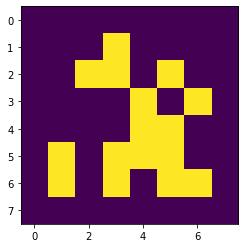

In [2]:
marker_pixels = marker_generator.generate_marker(marker_id=0)
plt.imshow(marker_pixels)

In [3]:
device = discover_one_device()
calibration = device.get_calibration()
gaze_mapper = GazeMapper(calibration)

In [4]:
marker_verts = {
   0: [ # marker id 0
      (32, 32), # Top left marker corner
      (96, 32), # Top right
      (96, 96), # Bottom right
      (32, 96), # Bottom left
   ]
}

screen_size = (1920, 1080)

screen_surface = gaze_mapper.add_surface(
   marker_verts,
   screen_size
)

In [5]:
screen_surface.uid

'a9221a9a-05f2-451f-a4d3-f39b827ba47f'

In [9]:
frame, gaze = device.receive_matched_scene_video_frame_and_gaze()
result = gaze_mapper.process_frame(frame, gaze)

for surface_gaze in result.mapped_gaze[screen_surface.uid]:
    print(f"Gaze at {surface_gaze.x}, {surface_gaze.y}")

Gaze at -0.13086217641830444, 1.164201259613037


In [10]:
result

MarkerMapperResult(markers=[<surface_tracker.marker._Marker object at 0x7fdfcc5e2140>, <surface_tracker.marker._Marker object at 0x7fdfcf1da1a0>, <surface_tracker.marker._Marker object at 0x7fdfcc5d22f0>, <surface_tracker.marker._Marker object at 0x7fdfcc5d2920>], located_aois={'a9221a9a-05f2-451f-a4d3-f39b827ba47f': <surface_tracker.location._SurfaceLocation_v2 object at 0x7fdfcc5e1780>}, mapped_gaze={'a9221a9a-05f2-451f-a4d3-f39b827ba47f': [MarkerMappedGaze(aoi_id='a9221a9a-05f2-451f-a4d3-f39b827ba47f', x=-0.13086217641830444, y=1.164201259613037, is_on_aoi=False, base_datum=805.7310791015625)]})

In [ ]:
img = cv2.cvtColor(frame.bgr_pixels, cv2.COLOR_BGR2RGB)
plt.imshow(img) 

In [12]:
device.close()

Exception ignored in: <async_generator object Connect.__aiter__ at 0x7fdfcf1f0340>
Traceback (most recent call last):
  File "/home/me/.local/lib/python3.10/site-packages/pupil_labs/realtime_api/device.py", line 78, in status_updates
    break
RuntimeError: async generator ignored GeneratorExit
